# Customer Churn
__Author__: David O'Donnell

---

## Problem Statement and Summary 

### Business Case
* A marketing manager is planning a new campaign designed to increase customer retention. Their plan is to deliver the campaign to a targeted audience defined as customers who are likely to abandon the brand within six months. This notebook contains a model that explores the underlying dataset and can identify these customers.

### Data
* The dataset provided is a snapshot of consumer purchase history taken in mid-June. Customers who made no additional purchases during the six months following the snapshot period were assigned a `churn` value of 1 to indicate that they had abandoned the brand.
* There were no additional measurements that the manager could reliably provide, so the model has been built using only the information provided here.

---

# Import Data and Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn as default template for plots
sns.set()

# Expand pandas display output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Load dataset from CSV
#path = 'C:\\Users\\577497\\Documents\\GitHub\\Customer-Churn\\'
path = '/Users/davidodonnell/Documents/GitHub/Customer-Churn/'
filename = 'train.csv'

df = pd.read_csv(path+filename, header=0, parse_dates=True).rename(columns={'apparell_spend': 'apparel_spend'})

---

## View Data

In [4]:
# View Columns and Memory Usage
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   last_purchase    2666 non-null   float64
 1   max_discount     2665 non-null   float64
 2   shoe_spend       2666 non-null   float64
 3   apparel_spend    2666 non-null   object 
 4   acc_spend        2666 non-null   int64  
 5   custserv_calls   2666 non-null   int64  
 6   churn            2666 non-null   int64  
 7   acc_purchasers   2666 non-null   int64  
 8   promo_purchaser  2666 non-null   int64  
 9   shoe_orders      2666 non-null   int64  
 10  apparel_orders   2666 non-null   int64  
 11  acc_orders       2666 non-null   int64  
 12  gender           2666 non-null   object 
 13  ecommShopper     2666 non-null   bool   
 14  bhShopper        2666 non-null   bool   
 15  state            2666 non-null   object 
 16  area_code        2666 non-null   int64  
 17  phone         

In [5]:
# View First Ten Lines of Data
df.head(10)

last_purchase  max_discount  shoe_spend apparel_spend  acc_spend  \
0           56.5          0.26       322.2         194.3        126   
1           84.0          0.46       279.1         170.9         92   
2           96.0          0.00       294.7           306         96   
3           62.0          0.00       255.4         185.6        100   
4           45.0          0.28       300.6         197.9        154   
5           68.5          0.00       243.4           217         96   
6           58.0          0.00       241.9         137.9         77   
7           62.0          0.26       226.3         220.3         66   
8          101.5          0.00       180.7          97.8         93   
9           80.0          0.32       159.7         124.4        106   

   custserv_calls  churn  acc_purchasers  promo_purchaser  shoe_orders  \
0               1      0               0                1            3   
1               0      0               0                1            2   
2               1      1               0                0            2   
3               2      0               0                0            2   
4               0      0               0                1            3   
5               0      0               0                0            2   
6               1      1               1                0            2   
7               1      0               0                1            2   
8               1      0               0                0            1   
9               2      0               1                1            1   

   apparel_orders  acc_orders  gender  ecommShopper  bhShopper state  \
0               2           4    Male         False       True    MS   
1               2           3    Male         False      False    OH   
2               3           3  Female          True      False    MI   
3               2           3    Male         False      False    VT   
4               2           5    Male         False       True    WV   
5               3           3    Male          True      False    FL   
6               2           3  Female         False       True    MA   
7               3           2  Female         False      False    WA   
8               2           3    Male         False       True    NY   
9               2           3  Female         False       True    ID   

   area_code     phone  
0        510  402-5509  
1        510  370-3021  
2        415  373-1448  
3        510  403-1769  
4        408  405-9384  
5        408  384-6654  
6        408  371-9457  
7        415  380-6631  
8        510  379-2991  
9        415  345-5980

In [6]:
# View Numerical Data
df.describe()

last_purchase  max_discount   shoe_spend    acc_spend  custserv_calls  \
count    2666.000000   2665.000000  2666.000000  2666.000000     2666.000000   
mean       70.961553      0.081418   245.565304   102.430983        1.556264   
std        19.978791      0.136785    54.538190    27.921276        1.312955   
min         0.000000      0.000000    65.000000     0.000000        0.000000   
25%        57.625000      0.000000   208.500000    85.000000        1.000000   
50%        71.500000      0.000000   245.350000   103.000000        1.000000   
75%        84.500000      0.200000   282.675000   121.000000        2.000000   
max       121.000000      0.500000   411.800000   200.000000        9.000000   

             churn  acc_purchasers  promo_purchaser  shoe_orders  \
count  2666.000000     2666.000000      2666.000000  2666.000000   
mean      0.149287        0.097524         0.277944     2.044261   
std       0.356438        0.296726         0.448070     0.534996   
min       0.000000        0.000000         0.000000     1.000000   
25%       0.000000        0.000000         0.000000     2.000000   
50%       0.000000        0.000000         0.000000     2.000000   
75%       0.000000        0.000000         1.000000     2.000000   
max       1.000000        1.000000         1.000000     3.000000   

       apparel_orders   acc_orders    area_code  
count     2666.000000  2666.000000  2666.000000  
mean         2.159790     3.251688   437.737059  
std          0.495355     0.816830    42.679743  
min          1.000000     0.000000   408.000000  
25%          2.000000     3.000000   415.000000  
50%          2.000000     3.000000   415.000000  
75%          2.000000     4.000000   510.000000  
max          3.000000     6.000000   510.000000

In [7]:
# Number of Unique Values per Column
for col in df.columns:
    print(F'{col}: {df[col].nunique()}')

last_purchase: 210
max_discount: 44
shoe_spend: 1507
apparel_spend: 1447
acc_spend: 160
custserv_calls: 10
churn: 2
acc_purchasers: 2
promo_purchaser: 2
shoe_orders: 3
apparel_orders: 3
acc_orders: 7
gender: 2
ecommShopper: 2
bhShopper: 2
state: 53
area_code: 3
phone: 2666


---

# Cleanse Data

## Clean Up Data (Types and Errors)

In [8]:
df['phone_number'] = df['area_code'].astype(str) + '-' + df['phone'].astype(str)

In [9]:
df.set_index('phone_number', inplace=True)
df.drop('phone', axis=1, inplace=True)

In lieu of customer id (which was not present in the dataset), "phone_number" is a unique value that can serve as the primary key.

### Handling Missing Data and Null Values

In [10]:
# Examine Missing and Null Values
df.isnull().sum()

last_purchase      0
max_discount       1
shoe_spend         0
apparel_spend      0
acc_spend          0
custserv_calls     0
churn              0
acc_purchasers     0
promo_purchaser    0
shoe_orders        0
apparel_orders     0
acc_orders         0
gender             0
ecommShopper       0
bhShopper          0
state              0
area_code          0
dtype: int64

In [20]:
# Improper value in apparel_spend
df.loc[df['max_discount'].isnull()]

# Impute errant value with median apparell_spend/apparel_orders * apparel_orders
df['max_discount'] = np.where(df['max_discount'].isnull(), 0, df['max_discount'])

Any maximum discounts that are errant/null have been imputed with 0 as there were no customers marked as "promo_purchaser". 

In [21]:
# Improper value in apparel_spend
df.loc[df['apparel_spend']=='a']

# Impute errant value with median apparell_spend/apparel_orders * apparel_orders
median_apparel_spend_order = df[['apparel_spend']].loc[df['apparel_spend']!='a'].median().values//df[['apparel_orders']].loc[df['apparel_spend']!='a'].median().values

df['apparel_spend'] = np.where(df['apparel_spend']!='a', df['apparel_spend'], median_apparel_spend_order*df['apparel_orders'])

Any apparel spend that are errant/null have been imputed with the median apparel spend per order multiplied by the number of orders. 

In [22]:
state_codes = ['AK','AL','AR','AZ','CA','CO','CT','DC','DE','FL','GA','HI','IA','ID','IL','IN','KS','KY','LA','MA','MD','ME','MI','MN','MO','MS','MT','NC','ND','NE','NH','NJ','NM','NV','NY','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VA','VT','WA','WI','WV','WY']

# Improper values in state
df.loc[~df['state'].isin(state_codes)]

df['state'] = np.where(df['state'].isin(state_codes), df['state'], np.nan)

The current data didn't allow imputation of improper state values. Rather than deriving conclusions from incorrect data, any value in the "state" column not pertaining to a state has been made null.

### Adjust Column Datatypes

In [23]:
# Format Continuous Variables as Floats
float_cols = [
    'last_purchase',
    'max_discount',
    'shoe_spend',
    'apparel_spend',
    'acc_spend'
]

for col in float_cols:
    df[col] = df[col].astype(str).str.replace(',', '')
    df[col] = df[col].astype(str).str.replace('$', '')
    df[col] = df[col].astype(float, errors='ignore')


# Format Continuous Variables as Floats
int_cols = [
    'custserv_calls',
    'shoe_orders',
    'apparel_orders',
    'acc_orders'
]

for col in int_cols:
    df[col] = df[col].astype(str).str.replace(',', '')
    df[col] = df[col].astype(str).str.replace('$', '')
    df[col] = df[col].astype(float).round(0).astype(int)


# Format Continuous Variables as Floats
bool_cols = [
    'churn',
    'acc_purchasers',
    'promo_purchaser',
    'ecommShopper',
    'bhShopper'
]

for col in bool_cols:
    df[col] = df[col].astype(bool)

# Format Categorical Variables
ex_cols = [] # Other columns that shouldn't be converted to a specific datatype
exclude_columns = float_cols+int_cols+bool_cols+ex_cols


# Categorical Data Types
n = 100 # Maximum number of unique values in a column to be classified as "category"

for col in df.columns:
    if df[col].nunique() < n and col not in exclude_columns:
        df[col] = df[col].astype('category')

Converting variables to their proper format will enable more accurate downstream analysis.

---

# Exploratory Data Analysis

In [24]:
# Divide data into dataframes based on whether the customer churned
churned_df = df.loc[df['churn']==True]
nonchurned_df = df.loc[df['churn']==False]

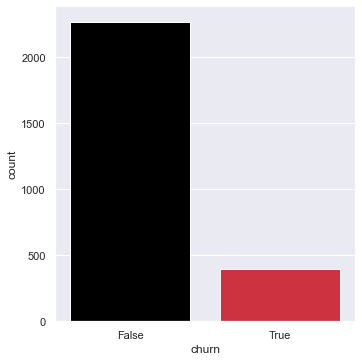

In [25]:
sns.catplot(x='churn', kind='count', data=df, palette=['#000000','#E7182C'])

In [26]:
customers = df.index.nunique()
churned = df.groupby('phone_number')['churn'].sum().sum()

# print(f'Of the {customers} unique customers, {round((churned/customers)*100, 1)}% or {churned} made no additional purchases during the six months following the snapshot period.')

### Description:
* Of the 2666 unique customers, 14.9% or 398 made no additional purchases during the six months following the snapshot period.
* There is a clear imbalance between customers who have churned and those who have not. 

<AxesSubplot:>

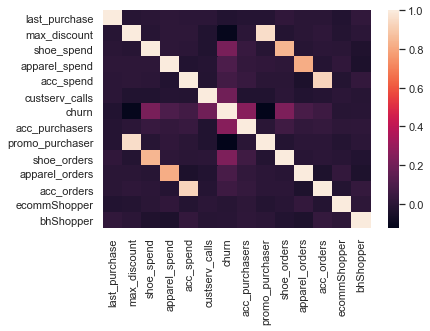

In [27]:
sns.heatmap(df.corr())

### Description:
* There are a few correlated variables that appear to have a causal relationship. For example the amount a customer spent on shoes is directly related to the number of shoe orders they placed. This could yield issues of multicollinearity.
*  Shoe and accessories (both spend and orders) and calls to customer service appear to be positively correlated with churn. This could mean that the more a customer spends/orders in those categories and the more calls he/she places through customer service, the more likely he/she is to churn.

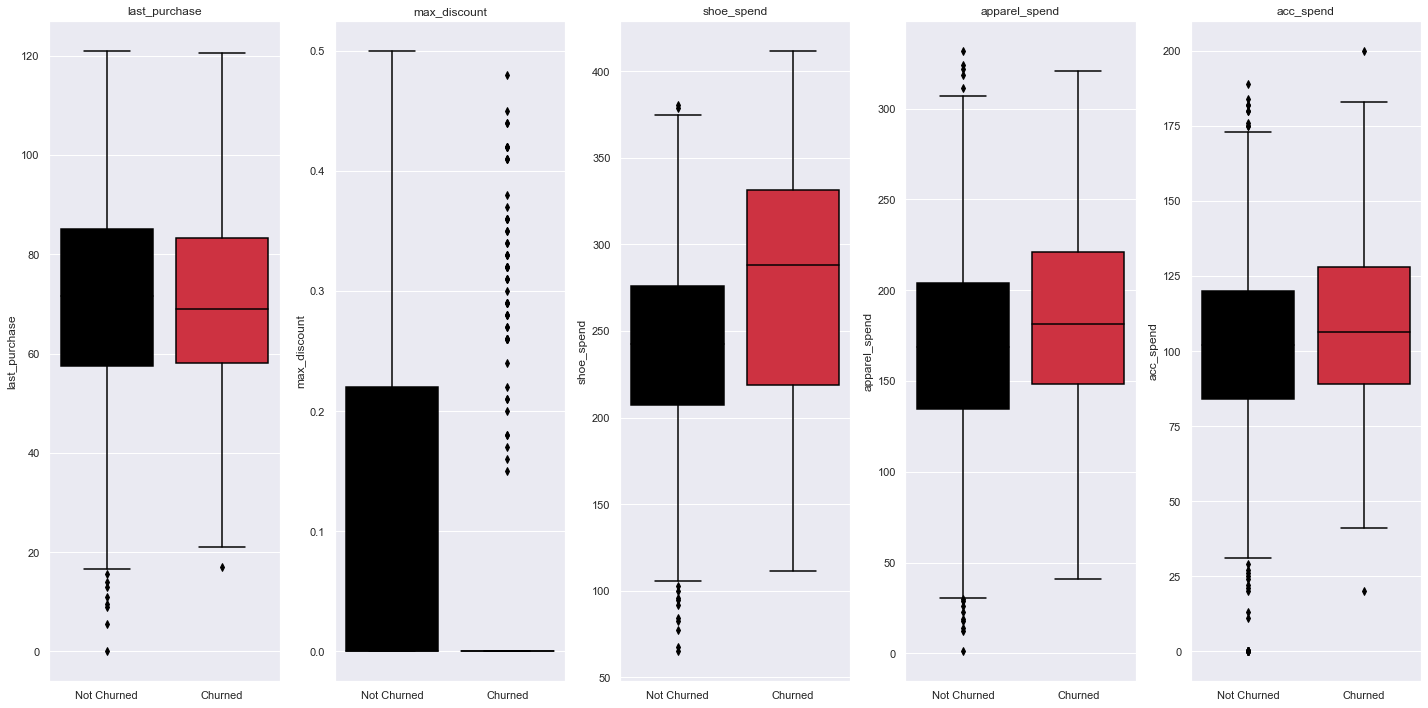

In [28]:
length = len(float_cols)

fig,axs = plt.subplots(nrows=1, ncols=length, figsize=(20,10))
i = 0

for col in float_cols:
    i+=1
    sns.boxplot(x='churn', y=col, data=df, palette=['#000000','#E7182C'], ax=axs[i-1])

    axs[i-1].set_title(col)
    axs[i-1].set_xticks([0,1])
    axs[i-1].set_xticklabels(['Not Churned','Churned'])
    axs[i-1].set_xlabel('')
    fig.tight_layout()

### Description:
* Any churned customer that received a discount is an outlier relative to that group. This means many customers who churned didn't receive discounts.
* There is a slight relationship between the amount a customer spends and their likelihood of churning.

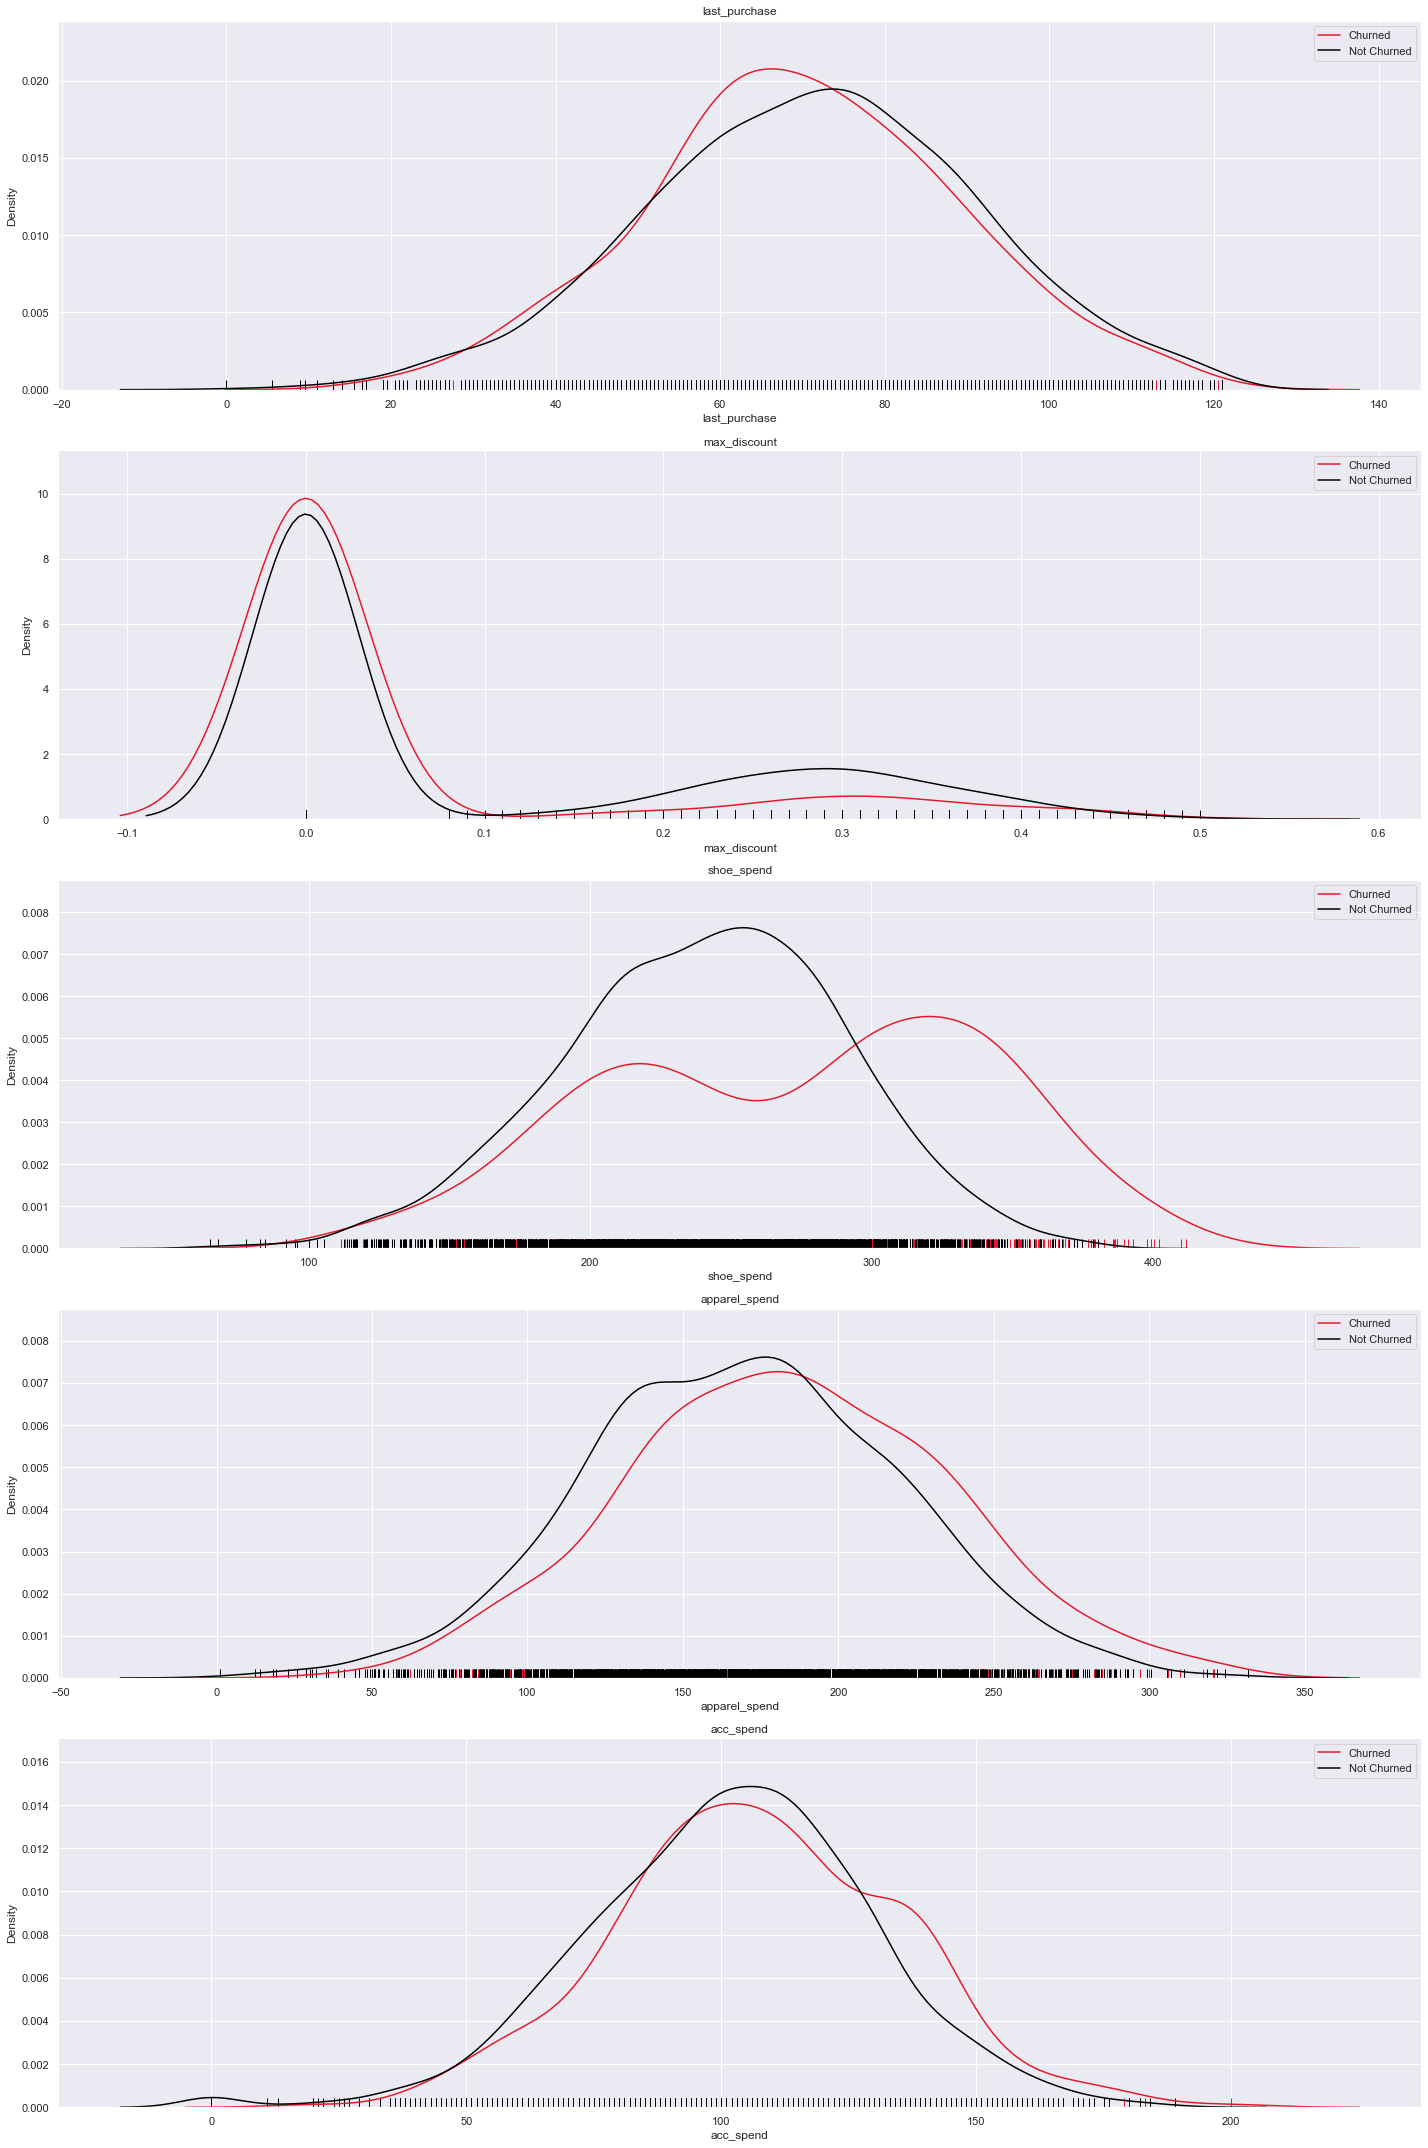

In [29]:
length = len(float_cols)

fig,axs = plt.subplots(nrows=length, ncols=1, figsize=(20,30))
i = 0

for col in float_cols:
    i+=1
    sns.distplot(churned_df[col], label='Churned', color='#E7182C', hist=False, rug=True, ax=axs[i-1])
    sns.distplot(nonchurned_df[col], label='Not Churned', color='#000000', hist=False, rug=True, ax=axs[i-1])

    axs[i-1].set_title(col)
    axs[i-1].legend()
    fig.tight_layout()

### Description:
* These distribution plots largely indicate the same trends as the boxplots above.

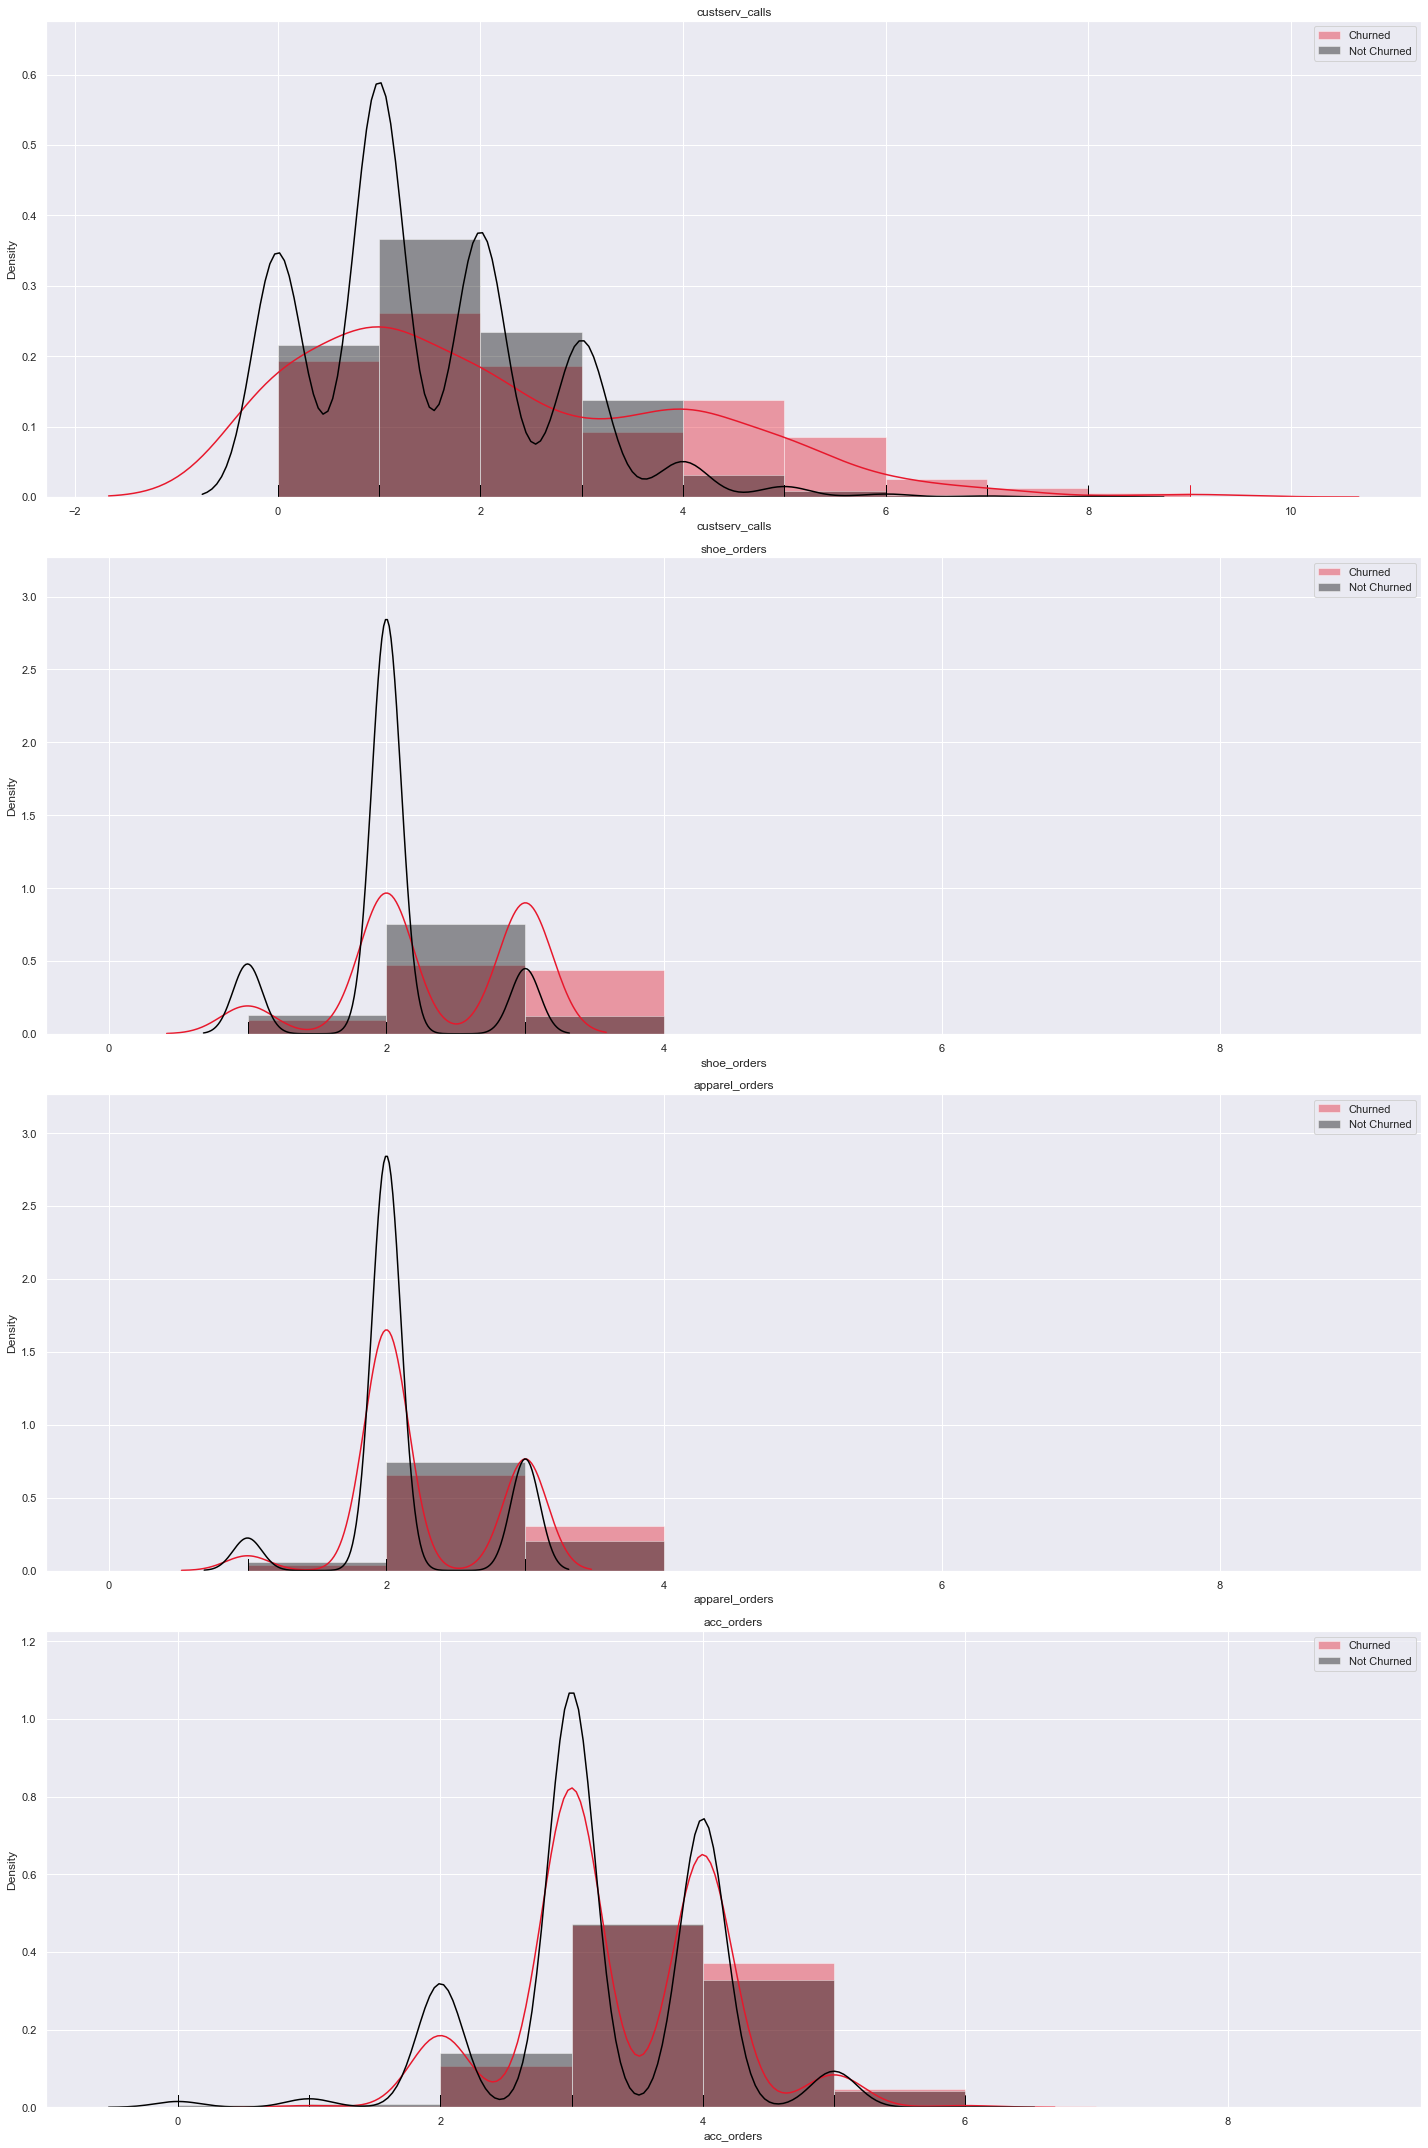

In [30]:
length = len(int_cols)

fig,axs = plt.subplots(nrows=length, ncols=1, figsize=(20,30))
i = 0

for col in int_cols:
    i+=1
    sns.distplot(churned_df[col], label='Churned', color='#E7182C', rug=True, bins=range(0,10), ax=axs[i-1])
    sns.distplot(nonchurned_df[col], label='Not Churned', color='#000000', rug=True, bins=range(0,10), ax=axs[i-1])

    axs[i-1].set_title(col)
    axs[i-1].legend()
    fig.tight_layout()

### Description:
* There appears to be a clear relationship between the number of calls a customer places to customer service and their status as "churned".

<AxesSubplot:xlabel='acc_purchasers'>

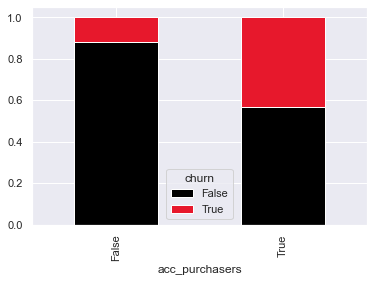

In [31]:
df.groupby('acc_purchasers')['churn'].value_counts(normalize=True).unstack('churn').plot(
    kind='bar', 
    stacked=True, 
    color=['#000000','#E7182C']
)

### Description:
* A higher proportion of accessory purchasers churned.

<AxesSubplot:xlabel='promo_purchaser'>

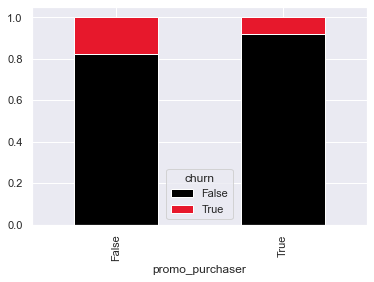

In [32]:
df.groupby('promo_purchaser')['churn'].value_counts(normalize=True).unstack('churn').plot(
    kind='bar', 
    stacked=True, 
    color=['#000000','#E7182C']
)

### Description:
* A lower proportion of promo-purchasers churned.

<AxesSubplot:xlabel='ecommShopper'>

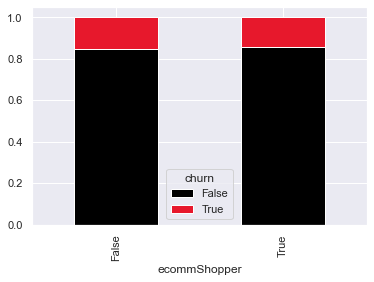

In [33]:
df.groupby('ecommShopper')['churn'].value_counts(normalize=True).unstack('churn').plot(
    kind='bar', 
    stacked=True, 
    color=['#000000','#E7182C']
)

### Description:
* There isn't a clear difference between ecommerce shoppers and traditional shoppers as it relates to churn.

### Description:
* A higher proportion of accessory purchasers churned.

<AxesSubplot:xlabel='gender'>

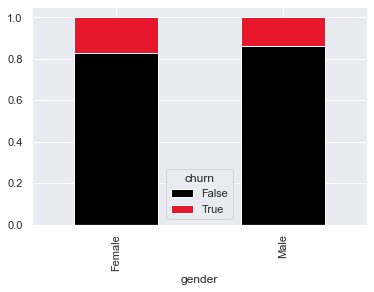

In [35]:
df.groupby('gender')['churn'].value_counts(normalize=True).unstack('churn').plot(
    kind='bar', 
    stacked=True, 
    color=['#000000','#E7182C']
)

### Description:
* Women are slightly more likely to churn than men.

<AxesSubplot:ylabel='state'>

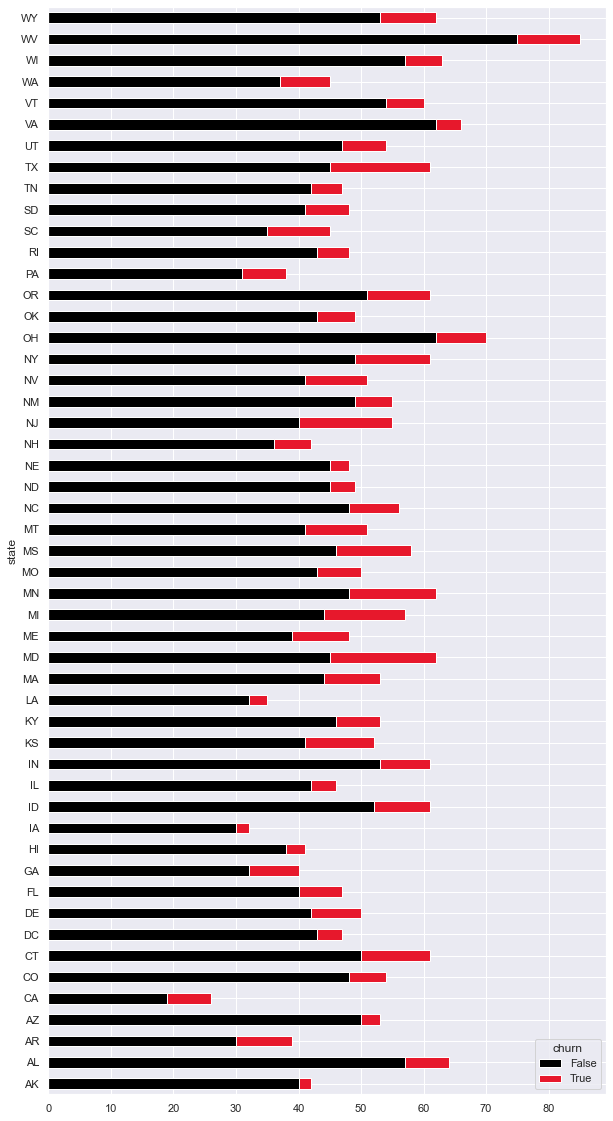

In [36]:
df.groupby('state')['churn'].value_counts().unstack('churn').plot(
    kind='barh', 
    stacked=True, 
    color=['#000000','#E7182C'], 
    figsize=(10,20)
)

### Description:
* There are a few states that have a higher proportion of churn than others, but the dataset samples are small and may not be representative of the entire customer base.

---

# Build and Evaluate Model

In [37]:
# Import Machine Learning Packages
# Preprocessing:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Model Selection/Hyperparameter Tuning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, roc_auc_score, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_curve, precision_recall_curve
from bayes_opt import BayesianOptimization

## Define Variables

In [38]:
for col in bool_cols:
    df[col] = df[col].astype(int)

In [39]:
# Determine dependent and independent variables based on dataset
y = df['churn']
X = df.drop(['churn','state','area_code'], axis=1)

Dropping state and area codes from the population due to irrelevance and potential for drawing improper conclusions.

## Normalize/Standardize Data (Set-Up Pipeline Steps and Hyperparameter Space)


In [40]:
# Preprocessing Pipeline
numeric_features = list(X.select_dtypes(include=['number']))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])

categorical_features = list(X.select_dtypes(include=['category']))
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)]
)

## Build Initial Model (Classification or Regression)

In [42]:
# Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Instantiate Baseline Classification Models
classifiers = [LogisticRegression(), RandomForestClassifier(n_estimators=100), GradientBoostingClassifier(), 
               XGBClassifier(objective='binary:logistic', eval_metric='auc')]

# Fit to the training set
for clf in classifiers:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    
    # Scoring Metrics
    acc = accuracy_score(y_test, predictions)
    roc_score = roc_auc_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    class_report = classification_report(y_test, predictions)

    print(pipeline.named_steps['classifier'].__class__.__name__)
    print(' Accuracy: {}'.format(acc))
    print(' AUC Score: {}'.format(roc_score))
    print(' Precision: {}'.format(precision))
    print(' Recall: {}'.format(recall))
    print(' F1 Score: {}'.format(f1))
    print(' Classification Report:\n{}'.format(class_report))
    print('\n')

LogisticRegression
 Accuracy: 0.8605697151424287
 AUC Score: 0.5872291568535092
 Precision: 0.4418604651162791
 Recall: 0.2159090909090909
 F1 Score: 0.2900763358778626
 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       579
           1       0.44      0.22      0.29        88

    accuracy                           0.86       667
   macro avg       0.67      0.59      0.61       667
weighted avg       0.83      0.86      0.84       667



RandomForestClassifier
 Accuracy: 0.9340329835082459
 AUC Score: 0.8030008635578584
 Precision: 0.8333333333333334
 Recall: 0.625
 F1 Score: 0.7142857142857143
 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       579
           1       0.83      0.62      0.71        88

    accuracy                           0.93       667
   macro avg       0.89      0.80      0.84       667
weighted avg       0.9

## Base Model Selection: XGBClassifier
* It is no surprise the Logistic Regression performed poorly as the data was not scaled. The other, tree-based models do not requre standardization of the data to account for outliers.

__AUC Score__
* The XGBClassifier had the highest AUC score of any of the baseline models.
* This is a good, comparative indication of model strength for binary classification.

__Precision__
* The XGBClassifier had the highest Precision score of any of the baseline models.
* Specifically, this yields the ratio of failed devices identified correctly as a percentage of failed devices predicted.
* This indicates the ability of the model to identify failed devices. A higher value indicates fewer false positives.

__Recall/Sensitivity__
* The XGBClassifier had the highest Recall score of any of the baseline models.
* Specifically, this yields the ratio of failed devices identified correctly as a percentage of total failed devices.
* This indicates the ability of the model to identify the relevant datapoints. A higher value indicates fewer false negatives.

__F1 Score__
* The XGBClassifier slightly outperformed the Gradient Boosted Classifier.
* Specifically, this takes into account both Precision and Recall (their harmonic mean) to assess the model's accuracy on the dataset.

---

## Hyperparameter Tuning

### GridSearchCV
#### Use GridSearchCV to determine the optimal hyperparameters based on the RandomSearchCV results

In [43]:
classifier = XGBClassifier(objective='binary:logistic', eval_metric='auc')

# Create Pipeline Object
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Use GridSearchCV for Hyperparameter Tuning
parameters = {
    'classifier__learning_rate': np.linspace(0,1,11),
    'classifier__max_depth': range(2,20,2),
    'classifier__n_estimators': range(50,500,50)
}

model = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, scoring='roc_auc')

model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.best_params_)

0.9287257205065031
{'classifier__learning_rate': 0.1, 'classifier__max_depth': 2, 'classifier__n_estimators': 100}


The model has been optimized with the appropriate hyperparameters (learning rate, depth, estimators) to yield the highest AUC score against validation data.

In [44]:
# Extracting the best parameters from model
parameters = model.best_params_
model = model.best_estimator_
print(model)

# Fit Model to Training Set
model.fit(X_train, y_train)

# Evaluate Model Performance
predictions = model.predict(X_test)

acc = accuracy_score(y_test, predictions)
roc_score = roc_auc_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(' Accuracy: {}'.format(acc))
print(' AUC Score: {}'.format(roc_score))
print(' Precision: {}'.format(precision))
print(' Recall: {}'.format(recall))
print(' F1 Score: {}'.format(f1))
print(' Classification Report:\n{}'.format(class_report))
print('\n')

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['last_purchase',
                                                   'max_discount', 'shoe_spend',
                                                   'apparel_spend', 'acc_spend',
                                                   'custserv_calls',
                                                   'acc_purchasers',
                                                   'promo_purchaser',
                                                   'shoe_orders',
                                                   'apparel_orders',
                                                   'acc_orders', 'ecommShopper',
                                                   'bhShopper']),
        

The optimized hyperparameters resulted in a XXXX@#$EAFDSAFAEWRWERWA increase in accuracy and ASFJOIAWR@#E increase in AUC score. 

---

## Examine Feature Importances

In [45]:
# Determine Variables (One Hot Encoded Categorical Variables and Numeric Variables)
onehot_columns = model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names(input_features=categorical_features)

feature_importance = pd.Series(data=model.named_steps['classifier'].feature_importances_, index = np.array(numeric_features + list(onehot_columns)))

Feature Importances:
                 importance
category                   
custserv_calls     0.258586
shoe_spend         0.170061
acc_purchasers     0.168798
max_discount       0.130375
acc_spend          0.109945
apparel_spend      0.085280
gender_Female      0.050328
last_purchase      0.026627
acc_orders         0.000000
apparel_orders     0.000000
bhShopper          0.000000
ecommShopper       0.000000
gender_Male        0.000000
promo_purchaser    0.000000
shoe_orders        0.000000


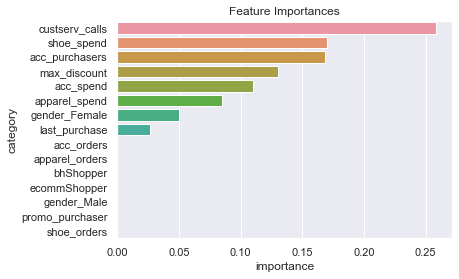

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Examine Feature Importance/Correlation Coefficients
columns = np.array(numeric_features + list(onehot_columns))

categories = [i.split('__', 1)[0] for i in columns]

importance_df = pd.DataFrame({
    'variable': columns, 
    'importance': model.named_steps['classifier'].feature_importances_,
    'category': categories
})

# Feature Importances DataFrame
cat_importance_df = importance_df.groupby('category').sum().sort_values(by='importance', ascending=False)
print("Feature Importances:\n{}".format(cat_importance_df))

# Plot Feature Importances
sns.barplot(x='importance', y=cat_importance_df.index, data=cat_importance_df)
plt.title('Feature Importances')
plt.show()

## Analysis
* Metric7, Metric4, Metric2 appear to be the most relevant for identifying whether a device will fail.
* From this, time (labeled as "period") appears to have a marginal impact. This will need to be decoupled from the premise that faulty devices are taken out of production (thus the longer a device is operating the more likely it is that it will fail). This can be further tested in a multivariate timeseries model. 

---

## Create Machine Learning Pipeline Library

In [ ]:
import pickle

# Dump the Model into a Machine Learning Pipeline Library
filename = 'model.sav'

pickle.dump(model, open(filename, 'wb'))

---

## Apply Model to New Data

In [ ]:
# Apply Model to New Data
new_df = pd.DataFrame()
predicted_df = pd.DataFrame(model.predict_proba(new_df))

# Concatenate New Dataframe with Predictions
predicted_df = pd.concat([new_df.reset_index(), predicted_df], axis=1)

---

# Key Takeaways
__Application of Machine Learning for the Client__
* For the initial deliverable, the tree-based classification model is able to provide predictive capabilities to help the company with its preventative maintenance problem. It also serves as a launching point for more complex models that can take additional factors into account.

__Interpretability__
* It is important to understand what metrics are most important and work with the company and device manufacturer to identify why they are important.
* From here, we can start determine important causal relationships.

__Deployment Strategy__
* Host a REST API Endpoint in SageMaker for inference in accordance with Best Practices.
* Retrieve daily telemetry data from fleet of devices. 
    * If only the most recent daily data is gathered, utilize Lambda function to append data to existing dataset and run updated calculations (see function below as example).
    * If the new data is appended automatically, the entire dataset should be available once again.
* Push transformed data to API Endpoint and conduct maintenance on devices that are predicted to fail.
* Retrain model as necessary (utilizing MLOps best practices)

---

# Future Areas of Exploration
Cluster Analysis to Target Specific Groups of Customers Likely to Churn